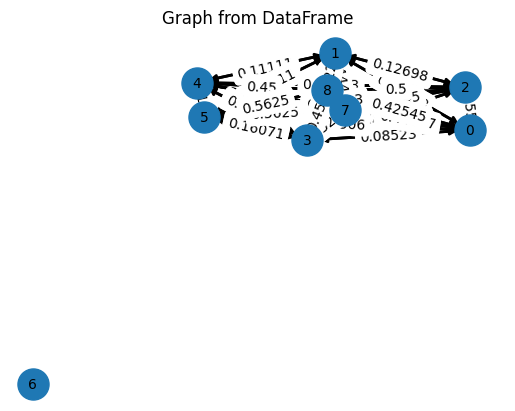

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./prep_out/estimated_d_index_plot_reg.csv')

data = df[df['filename'] == 'random_1']
data = data[data['r'] == 5]
data = data[data['sample_time'] == 0]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph using the DataFrame
for index, row in data.iterrows():
    node = row['type_id']  # Use the node_id column as the node
    G.add_node(node)
    weights = row[4:]  # Columns 4 onwards are the edge weights
    for target_node, weight in weights.items():
        target_node = int(target_node)  # Target node from column headers
        if weight > 0:  # Add only positive weights as edges
            G.add_edge(node, target_node, weight=weight)

# Drawing the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Display edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show plot
plt.title("Graph from DataFrame")
plt.axis("off")  # Turn off axis
plt.show()


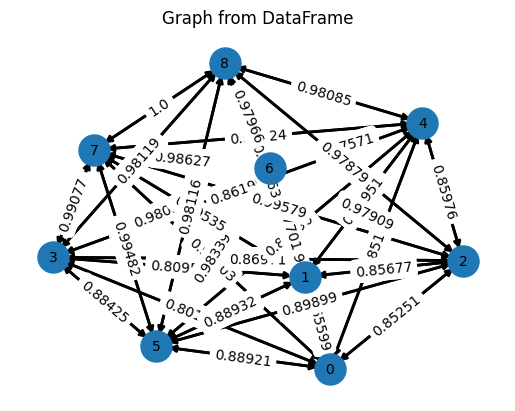

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./prep_out/baseline_d_index.csv')

data = df[df['filename'] == 'random_1']
data = data[data['sample_time'] == 0]

# Create a directed graph
G1 = nx.DiGraph()

# Add edges to the graph using the DataFrame
for index, row in data.iterrows():
    node = row['type_id']  # Use the node_id column as the node
    G1.add_node(node)
    weights = row[4:]  # Columns 4 onwards are the edge weights
    for target_node, weight in weights.items():
        target_node = int(target_node)  # Target node from column headers
        if weight > 0:  # Add only positive weights as edges
            G1.add_edge(node, target_node, weight=weight)

# Drawing the graph
pos = nx.spring_layout(G1)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G1, pos, node_size=500)

# Draw edges
nx.draw_networkx_edges(G1, pos, edgelist=G.edges(data=True), width=2)

# Draw labels
nx.draw_networkx_labels(G1, pos, font_size=10, font_family="sans-serif")

# Display edge weights
edge_labels = nx.get_edge_attributes(G1, 'weight')
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)

# Show plot
plt.title("Graph from DataFrame")
plt.axis("off")  # Turn off axis
plt.show()

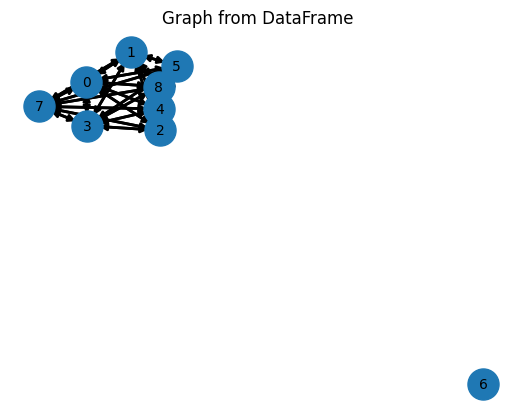

In [9]:
diff = nx.difference(G, G1)

# Drawing the graph
pos = nx.spring_layout(diff)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(diff, pos, node_size=500)

# Draw edges
nx.draw_networkx_edges(diff, pos, edgelist=G.edges(data=True), width=2)

# Draw labels
nx.draw_networkx_labels(diff, pos, font_size=10, font_family="sans-serif")

# Display edge weights
edge_labels = nx.get_edge_attributes(diff, 'weight')
nx.draw_networkx_edge_labels(diff, pos, edge_labels=edge_labels)

# Show plot
plt.title("Graph from DataFrame")
plt.axis("off")  # Turn off axis
plt.show()